In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("podatki.csv")
np.random.seed(0)
df = df.reindex(np.random.permutation(df.index))
display(df)
xs = df.drop(["y"], axis=1)
ys = df["y"]

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x22,x23,x24,x25,x26,x27,x28,x29,x30,y
308,2.0,2.14,5.0,9.0,9.69,32.33,18.0,50.0,18.0,19.78,...,108.0,9589.04,541.27,534.61,2.20,4.0,4.0,4.0,7.0,teamEdward
545,2.0,2.50,2.0,3.0,2.00,19.43,6.0,7.0,5.0,4.00,...,13.0,71.74,36.87,5.87,3.00,2.0,2.0,2.0,3.0,teamEdward
902,2.0,2.23,7.0,13.0,20.52,19.69,22.0,46.0,20.0,35.08,...,118.0,19356.95,587.15,1077.28,2.20,10.0,4.0,10.0,3.0,teamEdward
52,2.0,3.00,2.0,2.0,2.00,8.20,7.0,3.0,3.0,4.50,...,8.0,40.77,17.51,4.15,3.00,2.0,2.0,2.0,3.0,teamEdward
186,2.0,2.29,2.0,4.0,2.00,25.76,17.0,19.0,18.0,21.00,...,94.0,8579.24,453.43,478.51,2.25,2.0,2.0,2.0,3.0,teamEdward
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,4.0,2.10,4.0,7.0,14.90,33.25,16.0,40.0,13.0,18.00,...,106.0,8001.44,501.96,446.41,2.33,6.0,4.0,6.0,3.0,teamJacob
763,2.0,2.50,3.0,2.0,35.33,10.00,8.0,7.0,3.0,5.00,...,10.0,74.00,26.00,6.00,3.00,2.0,2.0,2.0,3.0,teamEdward
835,2.0,2.50,2.0,3.0,2.00,17.63,12.0,13.0,8.0,7.00,...,22.0,392.69,80.14,23.70,2.50,2.0,2.0,2.0,3.0,teamEdward
559,2.0,2.40,2.0,3.0,2.00,19.72,12.0,15.0,18.0,12.83,...,50.0,2082.00,194.00,117.56,2.25,2.0,2.0,2.0,5.0,teamEdward


In [3]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(xs, ys, train_size=0.8)

# 1.1 Ročno
We perform a train-test split and tune the parameters on the training dataset. We attempt using kNN method, neural networks, naive Bayes model, SVC and the random forest. We attempt to tune each manually to achieve the best cross validation score

In [4]:
from sklearn.model_selection import cross_validate

In [5]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=70)
cross_validate(knn, xtrain, ytrain, )["test_score"].mean()

0.8544689119170984

In [ ]:
from matplotlib.pyplot import plot

In [6]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(hidden_layer_sizes=(80), solver="sgd", random_state=1)
cross_validate(nn, xtrain, ytrain, cv=5, scoring="roc_auc")["test_score"].mean()

0.5474242424242425

In [7]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

nb = GaussianNB()
mnb = MultinomialNB()
print(cross_validate(nb, xtrain, ytrain, cv=5, scoring="roc_auc")["test_score"].mean())
print(cross_validate(mnb, xtrain, ytrain, cv=5, scoring="roc_auc")["test_score"].mean())

0.8211074596135571
0.4830114296272832


In [54]:
from sklearn.svm import SVC
svc = SVC(C=100)
cross_validate(svc, xtrain, ytrain, cv=5, scoring="roc_auc")["test_score"].mean()

0.7448672262696654

In [9]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=80,random_state=1)
cross_validate(rfc, xtrain, ytrain, cv=5, scoring="roc_auc")["test_score"].mean()

0.9300816967585261

All results are relatively close, with the correct choice of hyperparameters. We observe the best results with RandomForestClassifier, SVC and kNN, however, the results are often within margin of error.

We now plot how the score varies as the hyperparameter `n_estimators` of RFC varies

In [66]:
import matplotlib.pyplot as plt

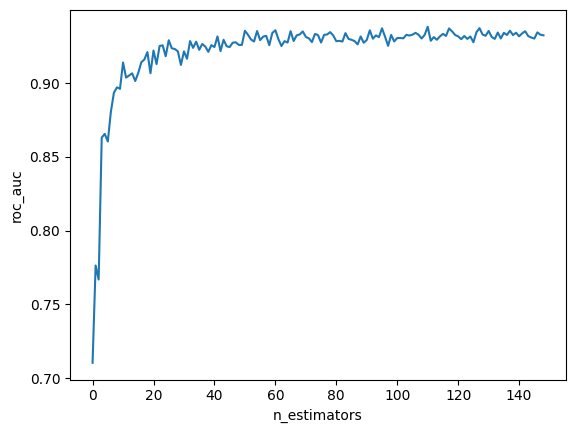

In [77]:

scores = [cross_validate(RandomForestClassifier(n_estimators=n), xtrain, ytrain, n_jobs=-1, cv=5, scoring="roc_auc")["test_score"].mean()
          for n in range(1,150)]
fig, ax = plt.subplots()
ax.set(xlabel="n_estimators", ylabel="roc_auc")
ax.plot(scores)
fig.savefig("rfc.png")
plt.show()

Plotting nearest neighbors

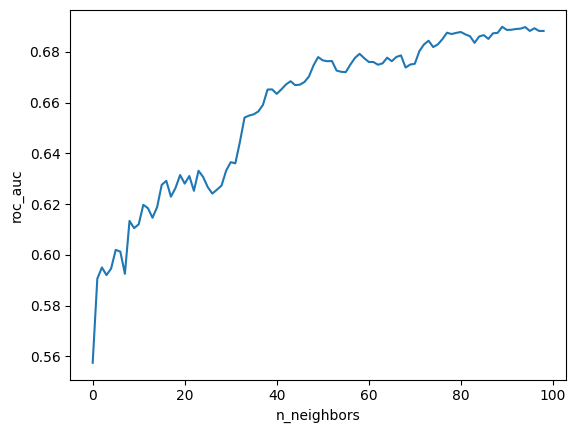

In [72]:
scores = [cross_validate(KNeighborsClassifier(n_neighbors=n), xtrain, ytrain, n_jobs=-1, cv=5, scoring="roc_auc")["test_score"].mean()
          for n in range(1,100)]
fig, ax = plt.subplots()
ax.set(xlabel="n_neighbors", ylabel="roc_auc")
ax.plot(scores)
fig.savefig("knn.png")
plt.show()

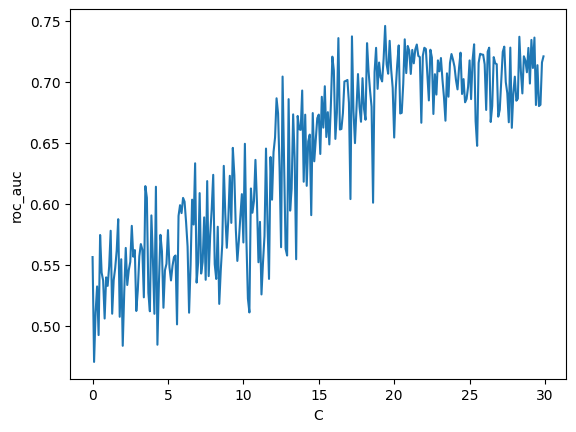

In [75]:

scores = [cross_validate(SVC(C=n/10), xtrain, ytrain, n_jobs=-1, cv=5, scoring="roc_auc")["test_score"].mean()
          for n in range(1,301)]
fig, ax = plt.subplots()
ax.set(xlabel="C", ylabel="roc_auc")
x_axis = np.arange(0.0, 30.0, 0.1)
ax.plot(x_axis,scores)
fig.savefig("svc.png")
plt.show()

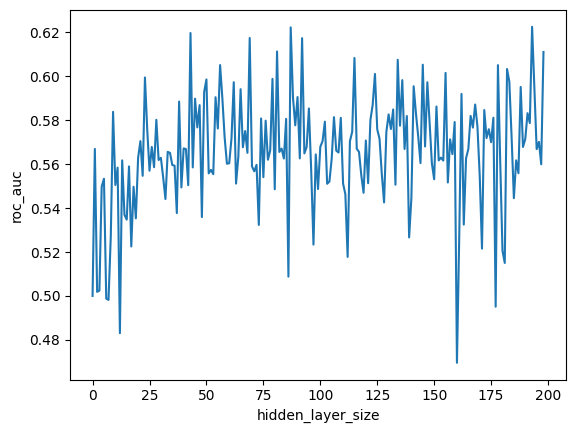

In [76]:
scores = [cross_validate(MLPClassifier(hidden_layer_sizes=(n), solver="sgd", max_iter=1000, random_state=1), xtrain, ytrain, n_jobs=-1, cv=5, scoring="roc_auc")["test_score"].mean()
          for n in range(1,200)]
fig, ax = plt.subplots()
ax.set(xlabel="hidden_layer_size", ylabel="roc_auc")
ax.plot(scores)
fig.savefig("mlp.png")
plt.show()

# 1.2 Avtomatizirano

In [10]:
from hyperopt import hp, tpe, fmin, Trials, space_eval

gnezdeni_prostor = {
    "algo": hp.choice("algo", [
    {
        "ime": "rfc",
        "n_estimators": hp.uniform("n_estimators", 32, 200),
        'max_depth': hp.uniform('max_depth', 2, 32),
        "criterion": hp.choice("criterion", ["gini", "entropy", "log_loss"]),
        "min_samples_split": hp.qloguniform("min_samples_split", 1, 8, 1)
    },
    {
        "ime": "svc",
        "C": hp.lognormal("C", 0, 1),
        "shrinking": hp.choice("shrinking", [True, False]),
        "kernel": hp.choice("kernel", [
            {
                "type": "rbf",
                "gamma": hp.lognormal("gamma2", 1/30, 1)
            },
            {
                "type": "sigmoid",
                "gamma": hp.lognormal("gamma3", 1/30, 1)
            },
        ])
    },
    {
        "ime": "knn",
        "n_neighbors": hp.uniform("n_neighbors", 2, 256),# [2,4,8,16,32,64, 128, 196, 256]),
        "weights": hp.choice("weights", ["uniform", "distance"]),
        "p": hp.choice("p", [1, 2, 3, 4]),
    }])
}

In [11]:
def search_rfc(params):
    return RandomForestClassifier(
        n_estimators=int(params["n_estimators"]),
        criterion=params["criterion"],
        max_depth=int(params["max_depth"]),
        min_samples_split=int(params["min_samples_split"]+1),
        random_state=1
    )

def search_svc(params):
    C = params["C"]
    shrinking = params["shrinking"]
    if params["kernel"]["type"] == "poly":
        return SVC(C=C, kernel="poly", gamma=params["kernel"]["gamma"],
                    degree=int(params["kernel"]["degree"]), shrinking=shrinking)
    if params["kernel"]["type"] == "rbf":
        return SVC(C=C, kernel="rbf", gamma=params["kernel"]["gamma"], shrinking=shrinking)
    return SVC(C=C, shrinking=shrinking, kernel="sigmoid", gamma=params["kernel"]["gamma"])

def search_knn(params):
    return KNeighborsClassifier(n_neighbors=int(params["n_neighbors"]), weights=params["weights"], p=params["p"])

def algorithms(params):
    x = params["algo"]
    name = x["ime"]
    model = None # Not needed due to python's scoping, polite.
    if name == "rfc":
        model = search_rfc(x)
    elif name == "knn":
        model = search_knn(x)
    else:
        model = search_svc(x)

    return 1-cross_validate(model, xtrain, ytrain, cv=5, scoring="roc_auc", n_jobs=-1)["test_score"].mean()

In [12]:
trials = Trials()
best = fmin(fn=algorithms,
            space=gnezdeni_prostor,
            algo=tpe.suggest,
            max_evals=250,
            trials=trials)
best = space_eval(gnezdeni_prostor, best)
best_value = algorithms(best)
display(best, 1-best_value)
best = best['algo']

100%|██████████| 250/250 [00:32<00:00,  7.63trial/s, best loss: 0.06243136944356453]


{'algo': {'criterion': 'log_loss',
  'ime': 'rfc',
  'max_depth': 29.11860836105708,
  'min_samples_split': 20.0,
  'n_estimators': 147.0849491134632}}

0.9375686305564355

In [13]:
from sklearn.metrics import roc_auc_score

rfc_auto = RandomForestClassifier(criterion=best['criterion'], 
                             max_depth=int(best['max_depth']), 
                             min_samples_split=int(best['min_samples_split']), 
                             n_estimators=int(best['min_samples_split']), 
                             random_state=1)
print("ploščina pod ROC krivuljo za RFC autoconfig:", 
      cross_validate(rfc_auto, xtrain, ytrain, cv=5, scoring="roc_auc")["test_score"].mean())

ploščina pod ROC krivuljo za RFC autoconfig: 0.9211516735297224


In [14]:
rfc_manual = RandomForestClassifier(n_estimators=80,random_state=1)

print("ploščina pod ROC krivuljo za RFC manual:", 
      cross_validate(rfc_manual, xtrain, ytrain, cv=5, scoring="roc_auc")["test_score"].mean())

ploščina pod ROC krivuljo za RFC manual: 0.9300816967585261


Na testni množici preverjamo na koncu

# Meta učenje

In [15]:
import openml as oml

In [16]:
d = oml.datasets.list_datasets(number_instances='1203..2203', number_features='30..131', output_format="dataframe")
data_ids = list(d["did"])
data_all = oml.datasets.get_datasets(data_ids)
display(data_all)

[OpenML Dataset
 Name..........: mfeat-fourier
 Version.......: 1
 Format........: ARFF
 Upload Date...: 2014-04-06 23:20:17
 Licence.......: Public
 Download URL..: https://api.openml.org/data/v1/download/14/mfeat-fourier.arff
 OpenML URL....: https://www.openml.org/d/14
 # of features.: 77
 # of instances: 2000,
 OpenML Dataset
 Name..........: mfeat-karhunen
 Version.......: 1
 Format........: ARFF
 Upload Date...: 2014-04-06 23:20:30
 Licence.......: Public
 Download URL..: https://api.openml.org/data/v1/download/16/mfeat-karhunen.arff
 OpenML URL....: https://www.openml.org/d/16
 # of features.: 65
 # of instances: 2000,
 OpenML Dataset
 Name..........: mfeat-zernike
 Version.......: 1
 Format........: ARFF
 Upload Date...: 2014-04-06 23:21:00
 Licence.......: Public
 Download URL..: https://api.openml.org/data/v1/download/22/mfeat-zernike.arff
 OpenML URL....: https://www.openml.org/d/22
 # of features.: 48
 # of instances: 2000,
 OpenML Dataset
 Name..........: us_crime
 Version

In [17]:
class Sanitized:
    def __init__(self, table, target, name, id):
        self.table = table
        self.target = target
        self.name = name
        self.id = id


all_sanitized = []

for data in data_all:

    x, y, a, b = data.get_data(target=data.default_target_attribute)
    if y is None:
        continue
    if len(x.index) != len(y.index):
        continue
    if data.id == 44651:
        continue

    x = x.dropna(axis=1, thresh=0.8*len(x.index))
    x = x.drop(x.select_dtypes(exclude=[np.number]), axis=1)
    x = x.fillna(x.mean())

    if 0 in x.shape:
        continue

    all_sanitized.append(Sanitized(x, y, data.name, data.id))
    
len(all_sanitized)

212

In [18]:
from pymfe.mfe import MFE

def compute_stat(xa, ya):

    x = np.array(xa)
    y = np.array(ya)
    mfe = MFE(groups=["general", "info-theory"])
    mfe.fit(x,y)
    _, x = mfe.extract()
    return x[:-1]

stats = [compute_stat(x.table, x.target) for x in all_sanitized]

/home/user/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/user/.local/lib/python3.10/site-packages/pymfe/_internal.py:1568: UserWarning: It is not possible make equal discretization
  warnings.warn("It is not possible make equal discretization")
/home/user/.local/lib/python3.10/site-packages/pymfe/_internal.py:1568: UserWarning: It is not possible make equal discretization
  warnings.warn("It is not possible make equal discretization")
/home/user/.local/lib/python3.10/site-packages/pymfe/_internal.py:1568: UserWarning: It is not possible make equal discretization
  warnings.warn("It is not possible make equal discretization")
/home/user/.local/lib/python3.10/site-packages/pymfe/_internal.py:1568: UserWarning: It is not possible make equal discretization
  warnings.warn("It is not possible 

In [19]:
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=3)
nbrs.fit(stats)

arr = compute_stat(xs, ys)
d, i = nbrs.kneighbors([arr])
i = i[0]
display(d, i)



/home/user/.local/lib/python3.10/site-packages/pymfe/_internal.py:1568: UserWarning: It is not possible make equal discretization
  warnings.warn("It is not possible make equal discretization")


array([[104.31735192, 255.35272391, 255.35272406]])

array([  4, 128,   8])

In [20]:

for dset in i:
    print("id:", all_sanitized[dset].id)
    print("name:", all_sanitized[dset].name)
    print("-----")

id: 930
name: colleges_usnews
-----
id: 44609
name: pc4_seed_1_nrows_2000_nclasses_10_ncols_100_stratify_True
-----
id: 1049
name: pc4
-----


Za id=930 (https://www.openml.org/search?type=data&sort=runs&status=active&id=930) uporabimo https://www.openml.org/search?type=run&sort=date&id=2083110/
Dobimo boljši rezultat kot prej!

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
p = PCA(copy=True, iterated_power='auto', n_components=None, random_state=None, svd_solver='auto', tol=0.0, whiten=False)
rfc =  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy', max_depth=9, max_features=0.25, max_leaf_nodes=None, min_impurity_decrease=1e-07, min_samples_leaf=1, min_samples_split=3, min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1, oob_score=False, random_state=1, verbose=0, warm_start=False)
pipe = Pipeline([('pca', p), ('randomforestclassifier', rfc)])
print("ploščina pod ROC krivuljo za pca+rfc:", 
      cross_validate(pipe, xtrain, ytrain, cv=5, scoring="roc_auc")["test_score"].mean())

ploščina pod ROC krivuljo za pca+rfc: 0.9203690212226798


In [22]:
pipe = Pipeline([('pca', p), ('randomforestclassifier', rfc)])
cross_validate(pipe, xtrain, ytrain, cv=5, scoring="roc_auc")["test_score"].mean()

0.9203690212226798

id=44609 nima nobenega taska! Iz imena pa vidimo, da je prišel iz https://www.openml.org/search?type=data&status=active&id=1049 (dataset pc4) torej poskusimo dva uspešna pristopa iz tega algoritma
najprej https://www.openml.org/search?type=run&sort=date&id=9176496%2F

In [23]:
from sklearn.feature_selection import VarianceThreshold

bc = Pipeline([('variencethreshold',VarianceThreshold()),('clf',RandomForestClassifier())])
print("ploščina pod ROC krivuljo za varianceThreshold+rfc:", 
      cross_validate(bc, xtrain, ytrain, cv=5, scoring="roc_auc")["test_score"].mean())

ploščina pod ROC krivuljo za varianceThreshold+rfc: 0.9331744271988175


in še https://www.openml.org/search?type=run&sort=date&id=10445869%2F

In [24]:
from sklearn.preprocessing import StandardScaler
bc = Pipeline([('standardscaler',StandardScaler()),('clf',RandomForestClassifier())])
print("ploščina pod ROC krivuljo za varianceThreshold+rfc:", 
      cross_validate(bc, xtrain, ytrain, cv=5, scoring="roc_auc")["test_score"].mean())

ploščina pod ROC krivuljo za varianceThreshold+rfc: 0.9344852708267343


Poskusimo še združiti oba pristopa (predprocesiranje z variance deluje bolje kot standard scaler)

In [25]:
p = PCA(copy=True, iterated_power='auto', n_components=None, random_state=None, svd_solver='auto', tol=0.0, whiten=False)
rfc =  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy', max_depth=9, max_features=0.25, max_leaf_nodes=None, min_impurity_decrease=1e-07, min_samples_leaf=1, min_samples_split=3, min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1, oob_score=False, random_state=1, verbose=0, warm_start=False)
bc = Pipeline([('variance',VarianceThreshold()),('pca', p),('clf',rfc)])
print("ploščina pod ROC krivuljo za varianceThreshold+pca+rfc:", 
      cross_validate(bc, xtrain, ytrain, cv=5, scoring="roc_auc")["test_score"].mean())

ploščina pod ROC krivuljo za varianceThreshold+pca+rfc: 0.9203690212226798


In [26]:
bc = Pipeline([('scaler',StandardScaler()),('pca', p),('clf',rfc)])
print("ploščina pod ROC krivuljo za scaler+pca+rfc:", 
      cross_validate(bc, xtrain, ytrain, cv=5, scoring="roc_auc")["test_score"].mean())

ploščina pod ROC krivuljo za scaler+pca+rfc: 0.9312108013937281


# Povzetek

Če povzamemo vse tri metode

ročno nastavljanje: 0.9300816967585261

metaučenje: 0.9211516735297224

OpenML pristop: 0.9344852708267343

Zdaj smo preizkusili metode in vidimo, da so vse približno enako dobre. V praksi bi vzeli najboljšo (OpenML) ali najenostavnejšo (ročno). Preverimo natančnost še na testni množici. Preverim tudi natančnosti ostalih ter z različnimi seedi, da vidim, če je odločitev statistično veljavna

In [81]:
N = 100
from statistics import mean

### AOC ročno

In [82]:
manual_scores = []
for i in range(N):
    rfc = RandomForestClassifier(n_estimators=80,random_state=i)
    rfc.fit(xtrain, ytrain)
    pred = rfc.predict_proba(xtest)
    manual_scores.append(roc_auc_score(ytest, pred[:,1]))

print(mean(manual_scores))

0.9304666839512574


### AOC auto

In [83]:
auto_scores = []
for i in range(N):
    rfc = RandomForestClassifier(criterion=best['criterion'], 
                             max_depth=int(best['max_depth']), 
                             min_samples_split=int(best['min_samples_split']), 
                             n_estimators=int(best['min_samples_split']), 
                             random_state=i)
    rfc.fit(xtrain, ytrain)
    pred = rfc.predict_proba(xtest)
    auto_scores.append(roc_auc_score(ytest, pred[:,1]))
print(mean(auto_scores))

0.9170871143375681


### AOC OpenML

In [84]:
openml_scores = []
for i in range(N):
    rfc = Pipeline([('standardscaler',StandardScaler()),('clf',RandomForestClassifier(random_state=i))])
    rfc.fit(xtrain, ytrain)
    pred = rfc.predict_proba(xtest)
    openml_scores.append(roc_auc_score(ytest, pred[:,1]))
print(mean(openml_scores))


0.930670210007778


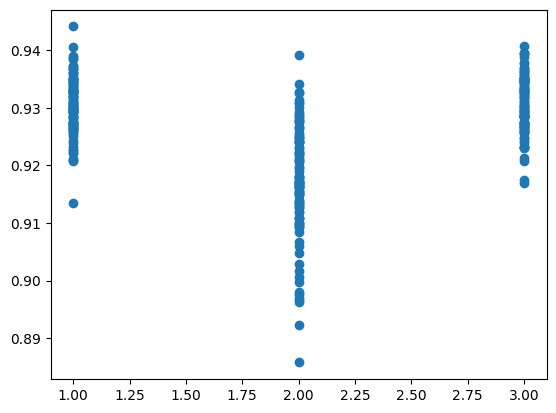

In [44]:
from matplotlib.pyplot import scatter
scores = manual_scores + auto_scores + openml_scores

x_coor = [1 for i in range(N)] + [2 for i in range(N)] + [3 for i in range(N)]

scatter(x_coor, scores)

Vidimo, da je ročno nastavljanje malenkost slabše in ima višjo varianco. Razlika med metaučenjem in openML učenjem je pa zanemarljiva.